## Convolutional Neural Network 




In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [2]:
# if you are using google colab for this task you can mount your GoogleDrive as follows: 
from google.colab import drive
drive.mount('/content/gdrive/')

# After running this cell you should enter the authorization code from your Google account

Mounted at /content/gdrive/


In [3]:
zip_path = '/content/gdrive/MyDrive/ITMO/master/machine_learning/Cats_and_Dogs.zip'
!cp "{zip_path}" .

!unzip -q Cats_and_Dogs.zip

!rm Cats_and_Dogs.zip

train = 'Cats_and_Dogs/train'
val = 'Cats_and_Dogs/val'
test = 'Cats_and_Dogs/test'

In [4]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

#train = './Cats_and_Dogs/train/'
#val =   './Cats_and_Dogs/val/'
#test =  './Cats_and_Dogs/test/'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples =  15000
# validation set size 
nb_validation_samples =  2400
# test set size
nb_test_samples = 2500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [5]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [6]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D((2,2),strides=2))

# 3:
model.add(Conv2D(32, (3, 3)))
#     +Relu
model.add(Activation('relu'))
# 4:  +Pooling

model.add(MaxPooling2D((2,2),strides=2))

# 5:  +Convolutional
model.add(Conv2D(64, (3,3)))
#     +Relu
model.add(Activation('relu'))
# 6:  +Pooling
model.add(MaxPooling2D((2,2)))
# 7:  +Flattening
model.add(Flatten())
# 8:  +Dense
model.add(Dense(128))
#     +ReLu
model.add(Activation('relu'))
# 9:  +Dropout
model.add(Dropout(0.15))
# 10: +Dense
model.add(Dense(1))
#     +Sigmoid
model.add(Activation('sigmoid'))


In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

his = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
234/234 [==============================] - 46s 198ms/step - loss: 0.4034 - accuracy: 0.8194 - val_loss: 0.4324 - val_accuracy: 0.7914
Epoch 2/10
234/234 [==============================] - 46s 195ms/step - loss: 0.3588 - accuracy: 0.8417 - val_loss: 0.4014 - val_accuracy: 0.8117
Epoch 3/10
234/234 [==============================] - 46s 197ms/step - loss: 0.3103 - accuracy: 0.8652 - val_loss: 0.3842 - val_accuracy: 0.8273
Epoch 4/10
234/234 [==============================] - 46s 197ms/step - loss: 0.2603 - accuracy: 0.8909 - val_loss: 0.4124 - val_accuracy: 0.8193
Epoch 5/10
234/234 [==============================] - 46s 197ms/step - loss: 0.2124 - accuracy: 0.9135 - val_loss: 0.4075 - val_accuracy: 0.8323
Epoch 6/10
234/234 [==============================] - 46s 197ms/step - loss: 0.1665 - accuracy: 0.9346 - val_loss: 0.4402 - val_accuracy: 0.8264
Epoch 7/10
234/234 [==============================] - 46s 196ms/step - loss: 0.1239 - accuracy: 0.9527 - val_loss: 0.5391 - val_ac

In [10]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy on test data: 83.81%


Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

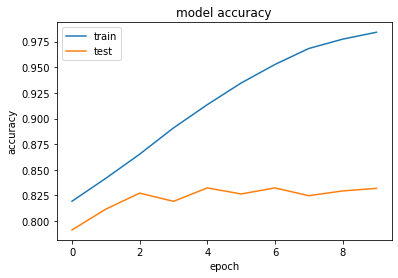

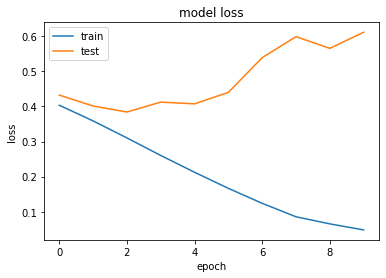

In [11]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [12]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [13]:
# add layers to VGG16:

model = Sequential()
model.add(vgg16_net)

# + flattening
model.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
model.add(Dense(256))
# + ReLu
model.add(Activation('relu'))
# + Dropout
model.add(Dropout(0.15))
# + Dense layer with 1 neuron
model.add(Dense(1))
# + sigmoid
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_6 (Activation)    (None, 1)                

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

E.g., it was like:


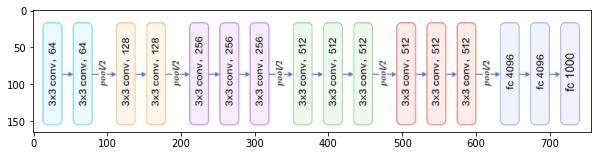

In [15]:
img = mpimg.imread('/content/gdrive/MyDrive/ITMO/master/machine_learning/VGG16.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

and it becomes:

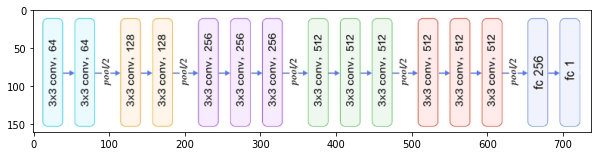

In [16]:
img = mpimg.imread('/content/gdrive/MyDrive/ITMO/master/machine_learning/VGG162.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

In [17]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

his = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
234/234 [==============================] - 57s 235ms/step - loss: 0.5562 - accuracy: 0.7081 - val_loss: 0.3539 - val_accuracy: 0.8560
Epoch 2/10
234/234 [==============================] - 55s 234ms/step - loss: 0.3314 - accuracy: 0.8619 - val_loss: 0.2997 - val_accuracy: 0.8792
Epoch 3/10
234/234 [==============================] - 55s 236ms/step - loss: 0.2885 - accuracy: 0.8801 - val_loss: 0.2726 - val_accuracy: 0.8910
Epoch 4/10
234/234 [==============================] - 55s 235ms/step - loss: 0.2604 - accuracy: 0.8936 - val_loss: 0.2550 - val_accuracy: 0.8965
Epoch 5/10
234/234 [==============================] - 55s 233ms/step - loss: 0.2426 - accuracy: 0.8996 - val_loss: 0.2473 - val_accuracy: 0.9037
Epoch 6/10
234/234 [==============================] - 55s 233ms/step - loss: 0.2287 - accuracy: 0.9053 - val_loss: 0.2454 - val_accuracy: 0.9024
Epoch 7/10
234/234 [==============================] - 55s 233ms/step - loss: 0.2200 - accuracy: 0.9095 - val_loss: 0.2292 - val_ac

In [19]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy on test data: 89.62%


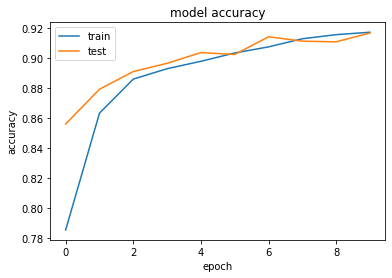

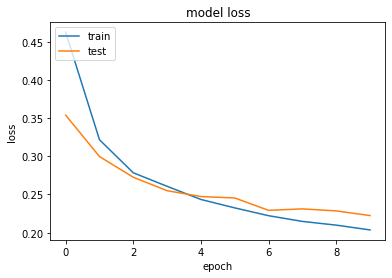

In [20]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Task 3 with InceptionV3 model
It weights 92 MB, has top-1 accuracy of	0.779	with 23,851,784 trainable parameters and depth of 159

In [21]:
from tensorflow.keras.applications import InceptionV3


inception_net = InceptionV3(weights='imagenet',
                  include_top=False,          # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
inception_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                              # Weights InceptionV3 in the process of learning will remain unchanged!

inception_net.summary()                       # pay attention to the number of trained and untrained parameters

87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_3[0][0]                   
__________________________________________________________________________________________________
activation_7 (Activation)       (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________

In [22]:
# add layers to InceptionV3

model = Sequential()
model.add(inception_net)

# + flattening
model.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
model.add(Dense(256))
# + ReLu
model.add(Activation('relu'))
# + Dropout
model.add(Dropout(0.15))
# + Dense layer with 1 neuron
model.add(Dense(1))
# + sigmoid
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               4718848   
_________________________________________________________________
activation_101 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_102 (Activation)  (None, 1)                

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])


In [24]:
his = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
234/234 [==============================] - 54s 212ms/step - loss: 0.2817 - accuracy: 0.8880 - val_loss: 0.1064 - val_accuracy: 0.9611
Epoch 2/10
234/234 [==============================] - 49s 210ms/step - loss: 0.1015 - accuracy: 0.9602 - val_loss: 0.1019 - val_accuracy: 0.9599
Epoch 3/10
234/234 [==============================] - 49s 209ms/step - loss: 0.0763 - accuracy: 0.9685 - val_loss: 0.0966 - val_accuracy: 0.9641
Epoch 4/10
234/234 [==============================] - 49s 210ms/step - loss: 0.0607 - accuracy: 0.9769 - val_loss: 0.0905 - val_accuracy: 0.9641
Epoch 5/10
234/234 [==============================] - 49s 209ms/step - loss: 0.0552 - accuracy: 0.9791 - val_loss: 0.0943 - val_accuracy: 0.9645
Epoch 6/10
234/234 [==============================] - 49s 208ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0959 - val_accuracy: 0.9649
Epoch 7/10
234/234 [==============================] - 49s 208ms/step - loss: 0.0334 - accuracy: 0.9896 - val_loss: 0.0906 - val_ac

In [25]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy on test data: 96.23%


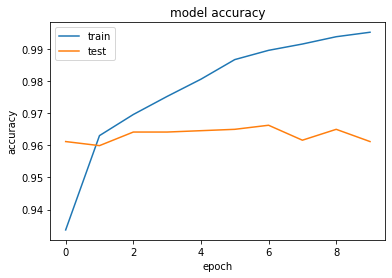

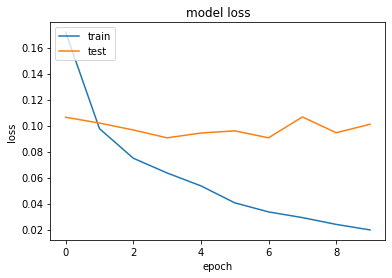

In [26]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Develpment of inference function and trying nn on custom image of my dog

In [47]:
import cv2
import numpy as np
import os

def test_on_images(model, folder):
  f_names = os.listdir(folder)
  
  for fname in f_names:
    path = os.path.join(folder, fname)
    img = cv2.imread(path)
    img = cv2.resize(img, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.axis('off')

    # Normalization
    img = img / 255
    img = np.expand_dims(img, axis=0)
    predicted_class = (model.predict(img) > 0.5).astype("int32")

    print(f"Predicted {'dog' if predicted_class==1 else 'cat'} on the image below")
    plt.show()


Predicted cat on the image below


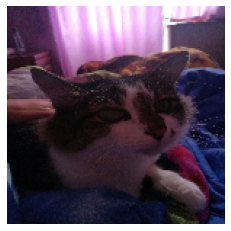

Predicted dog on the image below


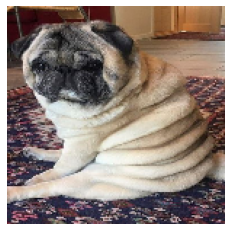

Predicted cat on the image below


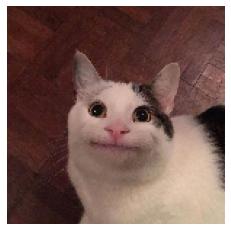

Predicted dog on the image below


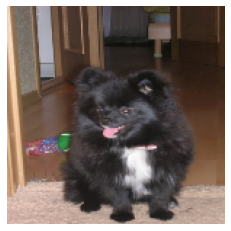

Predicted cat on the image below


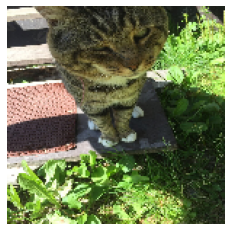

Predicted dog on the image below


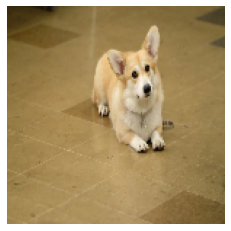

In [48]:
test_on_images(model, '/content/gdrive/MyDrive/ITMO/master/machine_learning/test_images/')